In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 1 - Import Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Data understanding

Train Size:
(50000, 32, 32, 3)
(50000, 1)
Test Size:
(10000, 32, 32, 3)
(10000, 1)


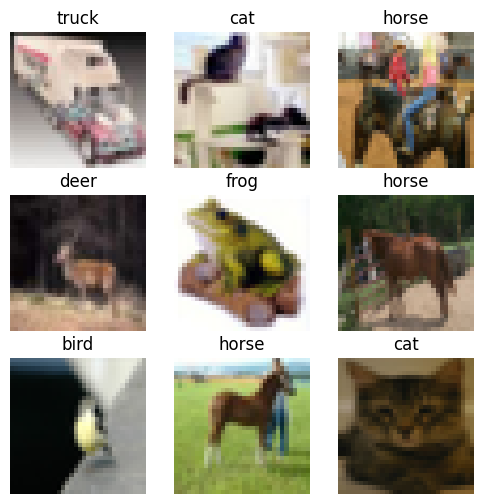

In [6]:
print("Train Size:")
print(x_train.shape)
print(y_train.shape)
print("Test Size:")
print(x_test.shape)
print(y_test.shape)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    idx = np.random.randint(low= 0, high=50000)
    plt.imshow(x_train[idx].astype("uint8"))
    plt.title(label_names[int(y_train[idx])])
    plt.axis("off")
    
    
    

# 2- Preprocess data

In [7]:
X_train = x_train/255.0
X_test = x_test/255.0

Y_train = tf.keras.utils.to_categorical(np.squeeze(y_train), 10)
Y_test = tf.keras.utils.to_categorical(np.squeeze(y_test), 10)

print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [8]:
from tensorflow.keras.models import Model

# Part One

Here we want to build an inception module

<img src='assets/inception.png'>

In [28]:
# load require layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Concatenate

def inception_module(previous_layer_data, num_filters, module_name):

    # Build all branches
    b1 = Conv2D(num_filters, 1, activation='relu', padding='same', strides=3, name = module_name + '_conv_b1')(previous_layer_data)

    b2 = Conv2D(num_filters, 1, 
                activation='relu', 
                padding='same', 
                name = module_name + '_conv_b2_1')(previous_layer_data)
    b2_2 = Conv2D(num_filters, 3, 
                  activation='relu', 
                  padding='same', 
                  strides=3, 
                  name = module_name + '_conv_b2_2')(b2)

    b3 = Conv2D(num_filters, 1, 
                activation='relu', 
                padding='same',
                name = module_name + '_conv_b3_1')(previous_layer_data)
    b3_2 = Conv2D(filters=10, 
                  kernel_size=5, 
                  activation='relu', 
                  padding='same', 
                  strides=3,
                  name = module_name + '_conv_b3_2')(b3)

    b4 = MaxPool2D(pool_size=(3,3), 
                   padding='same', 
                   name = module_name + '_maxpool_b4')(previous_layer_data)
    b4_2 = Conv2D(num_filters, 1, 
                  activation='relu', 
                  padding='same', 
                  name = module_name + '_conv_b4_1')(b4)

    # use Concatenate to combine branches
    out = Concatenate(axis=-1)([b1, b2_2, b3_2, b4_2])
    
    return out

# Use Input for the first layer
module_name = 'inception1'
previous_layer_data = Input(shape=(200, 200, 32))
out = inception_module(previous_layer_data, module_name)
# use Model to create the model
model = Model(inputs=previous_layer_data, outputs=out)

# from keras,utils use plot_model to see the model architecture


# Create a model using Inception Module

In [35]:
in1 = Input(shape=x_train.shape[1:])
x = inception_module(in1, 10, 'inception1')
x = inception_module(x, 20, 'inception2')
x = inception_module(x, 30,  'inception3')
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation='softmax')(x)

model_inception = Model(inputs=in1, outputs=out)

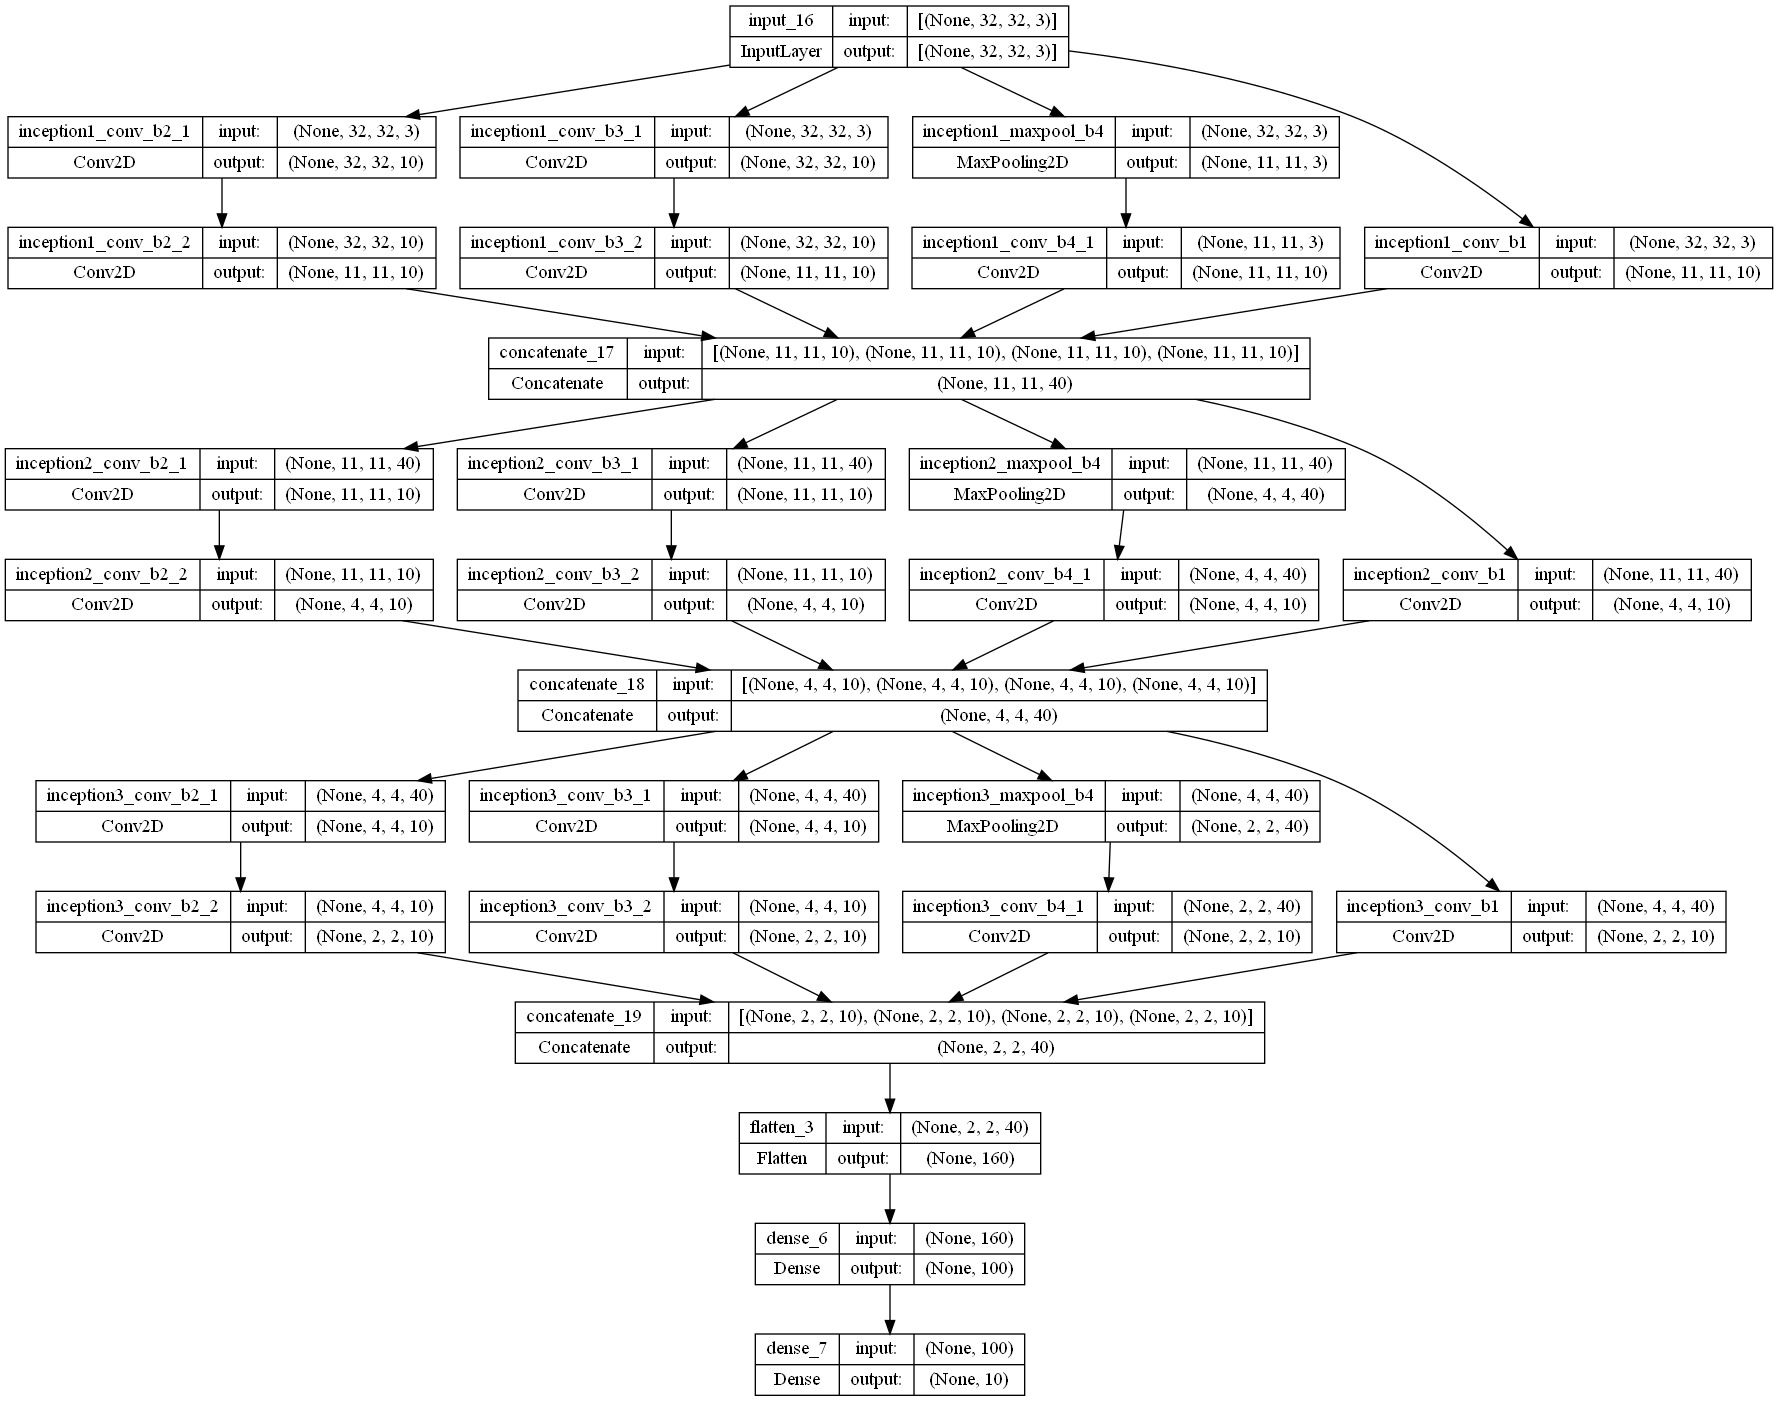

In [36]:
tf.keras.utils.plot_model(model_inception, show_shapes=True)

# Train Model

In [40]:
model_inception.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'],
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
)

In [41]:
hist = model_inception.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1250/1250 [==============================] - 50s 36ms/step - loss: 1.6852 - accuracy: 0.3886 - val_loss: 1.4892 - val_accuracy: 0.4571
Epoch 2/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.3991 - accuracy: 0.4955 - val_loss: 1.3958 - val_accuracy: 0.4980
Epoch 3/10
1250/1250 [==============================] - 42s 33ms/step - loss: 1.2885 - accuracy: 0.5382 - val_loss: 1.2868 - val_accuracy: 0.5394
Epoch 4/10
1250/1250 [==============================] - 41s 33ms/step - loss: 1.2162 - accuracy: 0.5640 - val_loss: 1.2260 - val_accuracy: 0.5616
Epoch 5/10
1250/1250 [==============================] - 42s 34ms/step - loss: 1.1616 - accuracy: 0.5800 - val_loss: 1.1998 - val_accuracy: 0.5732
Epoch 6/10
1250/1250 [==============================] - 43s 34ms/step - loss: 1.1145 - accuracy: 0.5996 - val_loss: 1.2056 - val_accuracy: 0.5697
Epoch 7/10
1250/1250 [==============================] - 44s 35ms/step - loss: 1.0773 - accuracy: 0.6150 - val_loss: 1.2450 -

In [42]:
hist2 = model_inception.fit(X_train, Y_train, validation_split=0.2, epochs=20, initial_epoch=10, batch_size=32)

Epoch 11/20
1250/1250 [==============================] - 33s 26ms/step - loss: 0.9649 - accuracy: 0.6555 - val_loss: 1.1366 - val_accuracy: 0.6050
Epoch 12/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.9396 - accuracy: 0.6634 - val_loss: 1.0976 - val_accuracy: 0.6140
Epoch 13/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.9208 - accuracy: 0.6698 - val_loss: 1.1179 - val_accuracy: 0.6193
Epoch 14/20
1250/1250 [==============================] - 39s 31ms/step - loss: 0.9049 - accuracy: 0.6773 - val_loss: 1.1422 - val_accuracy: 0.6025
Epoch 15/20
1250/1250 [==============================] - 36s 29ms/step - loss: 0.8818 - accuracy: 0.6825 - val_loss: 1.1084 - val_accuracy: 0.6217
Epoch 16/20
1250/1250 [==============================] - 34s 27ms/step - loss: 0.8662 - accuracy: 0.6892 - val_loss: 1.1217 - val_accuracy: 0.6147
Epoch 17/20
1250/1250 [==============================] - 34s 28ms/step - loss: 0.8513 - accuracy: 0.6944 - val_loss: 1

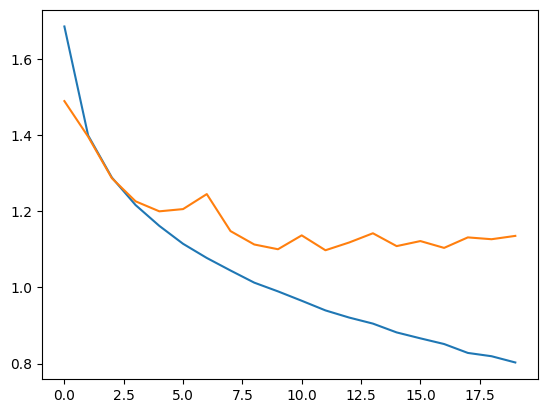

In [49]:
plt.plot(hist.history['loss']+hist2.history['loss'])
plt.plot(hist.history['val_loss']+hist2.history['val_loss'])

In [47]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Save Model

In [ ]:
# save model
mode.save(...)
# save weights


# Load Model

# Evaluate Model

In [ ]:
model.evaluate()

# Part 2: Transfer Learning

## Load pretrained  efficientnet model

In [50]:
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions

model = EfficientNetB1(weights='imagenet')



(1, 240, 240, 3)
1/1 [==============================] - 0s 46ms/step
[[('n02056570', 'king_penguin', 0.8996132), ('n02536864', 'coho', 0.0010206846), ('n02071294', 'killer_whale', 0.000727483), ('n03710721', 'maillot', 0.0006529442), ('n03218198', 'dogsled', 0.0006256991)]]


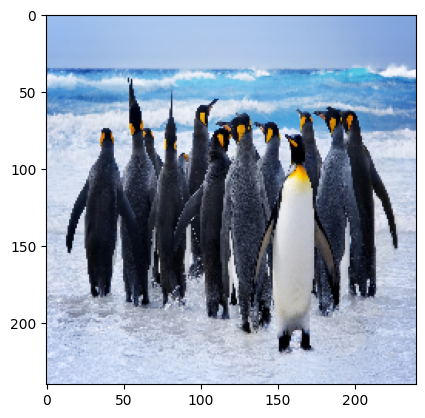

In [63]:
# your codes goes here
# we want to predict the results for an arbitrary image
import numpy as np

# 1- load image usin image.load_img  - set target size according to model
img = image.load_img('p1.jpg', target_size=(240, 240))
plt.imshow(img)

# 2- Change it to array using img_to_array
img = tf.keras.utils.img_to_array(img)


# 3- Preprocess data
img = preprocess_input(img)
img = img[np.newaxis, :, : ,:]
print(img.shape)

# 4- Predict outout
prediction = model.predict(img)

# 5- Decode the outputs (show top 3 predictions)
print(decode_predictions(prediction, top=5))

# Part 3:  Fine Tune MobileNetV2

# Use data augmentation layers
    Note: These layers are active only during training, when you call Model.fit. They are inactive when the model is used in inference mode in Model.evaluate 

In [68]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Visualize what this layer do

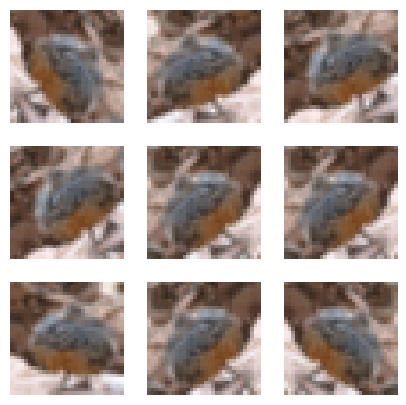

In [73]:
plt.figure(figsize=(5, 5))
first_image = x_train[356]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

## Rescale pixel values
In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel values in [-1, 1], but at this point, the pixel values in your images are in [0, 255]. To rescale them, use the preprocessing method included with the model.

In [74]:
# Solution 1 : use mobilenet_v2.preprocess_input
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Solution 2 : use layers to preprocess
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# Solution 3 : 
# X_train = x_train/127.7 - 1
# X_test = x_test/127.7 - 1

## Create the base model from the pre-trained convnets
You will create the base model from the MobileNet V2 model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like jackfruit and syringe. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the include_top=False argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [81]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(32,32,3),
                                               include_top=False,
                                               weights='imagenet')

## Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's trainable flag to False will freeze all of them.

In [92]:
base_model.trainable = True


In [97]:
for i in range(len(base_model.layers)-3):
    base_model.layers[i].trainable = False

In [98]:
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_20[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 4, 4, 144)   576         ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 4, 4, 144)    0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 4, 4, 32)     4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 4, 4, 32)    128         ['block_3_project[0][0]']        
 lization)                                                                                        
          

                                                                                                  
 block_7_expand_relu (ReLU)     (None, 2, 2, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 2, 2, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 2, 2, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_depthwise_relu (ReLU)  (None, 2, 2, 384)    0           ['block_7_depthwise_BN[0][0]']   
          

 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 2, 2, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 2, 2, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 2, 2, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_depthwise (DepthwiseC  (None, 2, 2, 576)   5184        ['block_11_expand_relu[0][0]']   
 onv2D)   

 block_14_depthwise_relu (ReLU)  (None, 1, 1, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 1, 1, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 1, 1, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 1, 1, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
                                                                                                  
 block_15_

## Add a classification head
To generate predictions from the block of features, average over the spatial 5x5 spatial locations, using a tf.keras.layers.GlobalAveragePooling2D layer to convert the features to a single 1280-element vector per image.

In [84]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# Add prediction Head

In [85]:
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')


Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API. As previously mentioned, use training=False as our model contains a BatchNormalization layer.

In [87]:
# 1 -Input layer
# 2 -Augmentation layer
# 3 -Preprocessing layer
# 4 -Global Average Pooling
# 5 -Dropout(0,2)
# 6 -Prediction Layer

in1 = Input(shape=x_train.shape[1:])
x = data_augmentation(in1)
x = preprocess_input(x)
x = base_model(x)
x = global_average_layer(x)
out = prediction_layer(x)

model = Model(inputs=in1, outputs=out)

In [88]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 32, 32, 3)        0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 32, 32, 3)        0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                           

## Compile the model
Compile the model before training it. Since there are two classes, use the tf.keras.losses.BinaryCrossentropy loss with from_logits=True since the model provides a linear output.

In [89]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

# Train

In [90]:
history = model.fit(x_train, Y_train,
                    epochs=10,
                    validation_split=0.2,
                    batch_size=32)

Epoch 1/10
  76/1250 [>.............................] - ETA: 9:54 - loss: 2.3138 - categorical_accuracy: 0.0933

KeyboardInterrupt: 